<h1 align="center"><font size="5">College Basketball Final Four Prediction</font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season

### Load Data From CSV File  

Let's load the dataset [NB Need to provide link to csv file]

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 

In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing



Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.

In [5]:
df1 = df[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

40 teams made it into the Sweet Sixteen, 20 into the Elite Eight, and 10 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

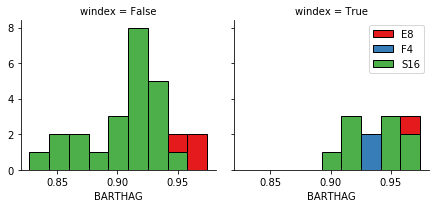

In [8]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

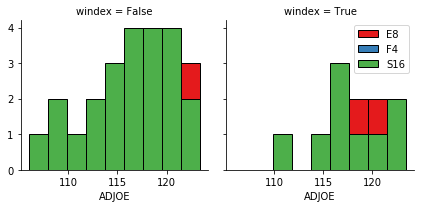

In [9]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at how Adjusted Defense Efficiency plots

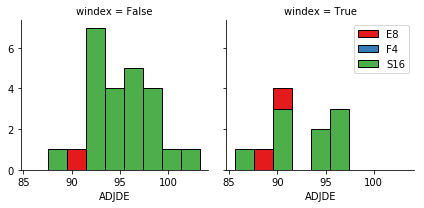

In [10]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four. 

## Convert Categorical features to numerical values

Lets look at the postseason:

In [11]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

12% of teams with 6 or less wins above bubble make it into the final four while 18% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [12]:
df['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,1
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,1
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1


## One Hot Encoding  
#### How about seed?

In [13]:
df1.groupby(['SEED'])['POSTSEASON'].value_counts(normalize=True)

SEED  POSTSEASON
1.0   E8            0.750000
      F4            0.125000
      S16           0.125000
2.0   S16           0.444444
      E8            0.333333
      F4            0.222222
3.0   S16           0.700000
      E8            0.200000
      F4            0.100000
4.0   S16           0.875000
      E8            0.125000
5.0   S16           0.833333
      F4            0.166667
6.0   E8            1.000000
7.0   S16           0.800000
      F4            0.200000
8.0   S16           1.000000
9.0   E8            1.000000
10.0  F4            1.000000
11.0  S16           0.500000
      E8            0.250000
      F4            0.250000
12.0  S16           1.000000
Name: POSTSEASON, dtype: float64

#### Feature before One Hot Encoding

In [14]:
df1[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D']].head()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D
2,118.3,103.3,0.8269,54.0,49.5
3,119.9,91.0,0.9600,54.8,48.4
4,120.9,90.4,0.9662,55.7,45.1
5,118.4,96.2,0.9163,52.3,48.9
6,111.9,93.6,0.8857,50.0,47.3


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [15]:
Feature = df1[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D']]
Feature = pd.concat([Feature,pd.get_dummies(df1['POSTSEASON'])], axis=1)
Feature.drop(['S16'], axis = 1,inplace=True)
Feature.head()


,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,E8,F4
2,118.3,103.3,0.8269,54.0,49.5,1,0
3,119.9,91.0,0.9600,54.8,48.4,1,0
4,120.9,90.4,0.9662,55.7,45.1,1,0
5,118.4,96.2,0.9163,52.3,48.9,1,0
6,111.9,93.6,0.8857,50.0,47.3,0,1


### Feature selection

Lets defind feature sets, X:

In [16]:
X = Feature
X[0:5]

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,E8,F4
2,118.3,103.3,0.8269,54.0,49.5,1,0
3,119.9,91.0,0.9600,54.8,48.4,1,0
4,120.9,90.4,0.9662,55.7,45.1,1,0
5,118.4,96.2,0.9163,52.3,48.9,1,0
6,111.9,93.6,0.8857,50.0,47.3,0,1


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|

In [17]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.28034482,  2.74329908, -2.45717765,  0.10027963,  0.94171924,
         1.58113883, -0.40824829],
       [ 0.64758014, -0.90102957,  1.127076  ,  0.39390887,  0.38123706,
         1.58113883, -0.40824829],
       [ 0.87710222, -1.0788017 ,  1.29403598,  0.72424177, -1.30020946,
         1.58113883, -0.40824829],
       [ 0.30329703,  0.63966222, -0.04972253, -0.52368251,  0.63600169,
         1.58113883, -0.40824829],
       [-1.18859646, -0.13068368, -0.87375079, -1.36786658, -0.17924511,
        -0.63245553,  2.44948974]])

## Training and Validation 

Split the data into Training and Validation data.

In [19]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 7) (44,)
Validation set: (12, 7) (12,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals three, find the accuracy on the validation data (X_val and y_val)

You can use <code> accuracy_score</cdoe>

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k = 3
finalfour_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

yhat = finalfour_knn.predict(X_val)

print("Train set Accuracy: ", accuracy_score(y_train, finalfour_knn.predict(X_train)))
print("Validation set Accuracy: ", accuracy_score(y_val, yhat))

Train set Accuracy:  0.9772727272727273
Validation set Accuracy:  1.0


<b>Question  2</b> Determine the accuracy for the first 15 values of k the on the validation data:

In [21]:
k_vals = []
train_scores = []
val_scores = []

for k in range(1,16):
    finalfour_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = finalfour_knn.predict(X_val)
    k_vals.append(k)
    train_scores.append(accuracy_score(y_train, finalfour_knn.predict(X_train)))
    val_scores.append(accuracy_score(y_val, yhat))

knn_k_scores = {"K": k_vals, "Training Set Accuracy": train_scores, "Validation Set Accuracy": val_scores}

df_k_scores = pd.DataFrame(knn_k_scores)
np.array(val_scores)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 0.91666667, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333])

# Decision Tree

The following lines of code fit a <code>DecisionTreeClassifier</code>:

In [22]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 

In [23]:
depths = []
val_scores = []

for d in range(1,16):
    finalfour_tree = DecisionTreeClassifier(max_depth = d)
    finalfour_tree.fit(X_train, y_train)
    finalfour_predtree = finalfour_tree.predict(X_val)
    depths.append(d)
    val_scores.append(accuracy_score(y_val, finalfour_predtree))
     
depth_accuracy = {"Max Depth": depths, "Validation Set Accuracy": val_scores}
df_d_scores = pd.DataFrame(depth_accuracy)
print("To achieve improved accuracy, max depth must be at least 2")
df_d_scores 
# Need max_depth >= 2

To achieve improved accuracy, max depth must be at least 2


,Max Depth,Validation Set Accuracy
0,1,0.833333
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000


In [24]:
finalfour_tree = DecisionTreeClassifier(max_depth = 2)
finalfour_tree.fit(X_train, y_train)
finalfour_predtree = finalfour_tree.predict(X_val)
print("Accuracy score",accuracy_score(y_val, finalfour_predtree))

Accuracy score 1.0


# Support Vector Machine

<b>Question  4</b>Train the following linear  support  vector machine model and determine the accuracy on the validation data 

In [25]:
from sklearn import svm

In [26]:
finalfour_svm = svm.SVC(kernel='linear')
finalfour_svm.fit(X_train, y_train) 
yhat = finalfour_svm.predict(X_val)
print("Validation set Accuracy: ", accuracy_score(y_val, yhat))

Validation set Accuracy:  1.0


# Logistic Regression

<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
finalfour_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat = finalfour_LR.predict(X_val)
print("Validation set Accuracy: ", accuracy_score(y_val, yhat))

Validation set Accuracy:  1.0


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Model Evaluation using Test set

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [30]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data.

### Load Test set for evaluation 

In [31]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016
8,Davidson,A10,32,19,113.0,106.0,0.6767,52.0,52.0,14.2,...,30.6,51.1,52.2,35.5,34.3,71.3,-2.1,NaN,NaN,2016
9,Duquesne,A10,33,16,108.2,105.1,0.5851,53.9,49.4,18.9,...,38.6,53.1,42.8,36.6,40.2,73.6,-7.8,NaN,NaN,2016


In [32]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_df1. head()
test_df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)
test_Feature = test_df1[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df1['POSTSEASON'])], axis=1)
test_Feature.drop(['S16'], axis = 1,inplace=True)
test_Feature.head()
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


array([[ 3.37365934e-01,  2.66479976e+00, -2.46831661e+00,
         2.13703245e-01,  9.44090550e-01,  1.58113883e+00,
        -4.08248290e-01],
       [ 7.03145068e-01, -7.13778644e-01,  1.07370841e+00,
         4.82633172e-01,  4.77498943e-01,  1.58113883e+00,
        -4.08248290e-01],
       [ 9.31757027e-01, -8.78587347e-01,  1.23870131e+00,
         7.85179340e-01, -9.22275877e-01,  1.58113883e+00,
        -4.08248290e-01],
       [ 3.60227129e-01,  7.14563447e-01, -8.92254236e-02,
        -3.57772849e-01,  6.89586037e-01,  1.58113883e+00,
        -4.08248290e-01],
       [-1.12575060e+00,  3.92401673e-04, -9.03545224e-01,
        -1.13094639e+00,  1.09073363e-02, -6.32455532e-01,
         2.44948974e+00]])

In [33]:
test_y = test_df1['POSTSEASON'].values
test_y

array(['E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'F4', 'F4',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'E8',
       'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8',
       'F4', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16'],
      dtype=object)

KNN

In [34]:
F1 = f1_score(finalfour_knn.predict(test_X), test_y, average='micro')
Jaccard = jaccard_index(finalfour_knn.predict(test_X), test_y)
print("F1-Score: {}\nJaccard Index: {}".format(F1, Jaccard))

F1-Score: 0.7714285714285715
Jaccard Index: 0.627906976744186


Decision Tree

In [35]:
F1 = f1_score(test_y, finalfour_tree.predict(test_X), average='micro')
Jaccard = jaccard_index(finalfour_tree.predict(test_X), test_y)
print("F1-Score: {}\nJaccard Index: {}".format(F1, Jaccard))

F1-Score: 1.0
Jaccard Index: 1.0


SVM

In [36]:
F1 = f1_score(test_y, finalfour_svm.predict(test_X), average='micro')
Jaccard = jaccard_index(finalfour_svm.predict(test_X), test_y)
print("F1-Score: {}\nJaccard Index: {}".format(F1, Jaccard))

F1-Score: 1.0
Jaccard Index: 1.0


Logistic Regression

In [37]:
F1 = f1_score(test_y, finalfour_LR.predict(test_X), average='micro')
Jaccard = jaccard_index(finalfour_LR.predict(test_X), test_y)
LogLoss = log_loss(test_y, finalfour_LR.predict_proba(test_X))
print("F1-Score: {}\nJaccard Index: {}\nLog-Loss: {}".format(F1, Jaccard, LogLoss))

F1-Score: 1.0
Jaccard Index: 1.0
Log-Loss: 0.9742807754772282


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |.93      |.93       | NA      |
| Decision Tree      | 1       | 1        | NA      |
| SVM                | 1       | 1        | NA      |
| LogisticRegression | 1       | 1        | .97     |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>